#**Algoritma K-Nearest Neighbor(KNN)**

---



---



Algoritma K-Nearest Neighbors adalah algoritma Machine Learning yang melakukan klasifikasi sebuah data didasarkan pada sifat-sifat data didekatnya. Sebuah ungkapan yang bisa membantu dengan mudah memahami ide dasar dari algoritma ini adalah: "Jika kamu ingin mengetahui sifat sesorang, lihatlah sifat-sifat orang terdekatnya. Sifatnya tidak akan jauh berbeda dari mereka".

Gambar dibawah ini dapat mengilustrasikan hal di atas dengan jelas.

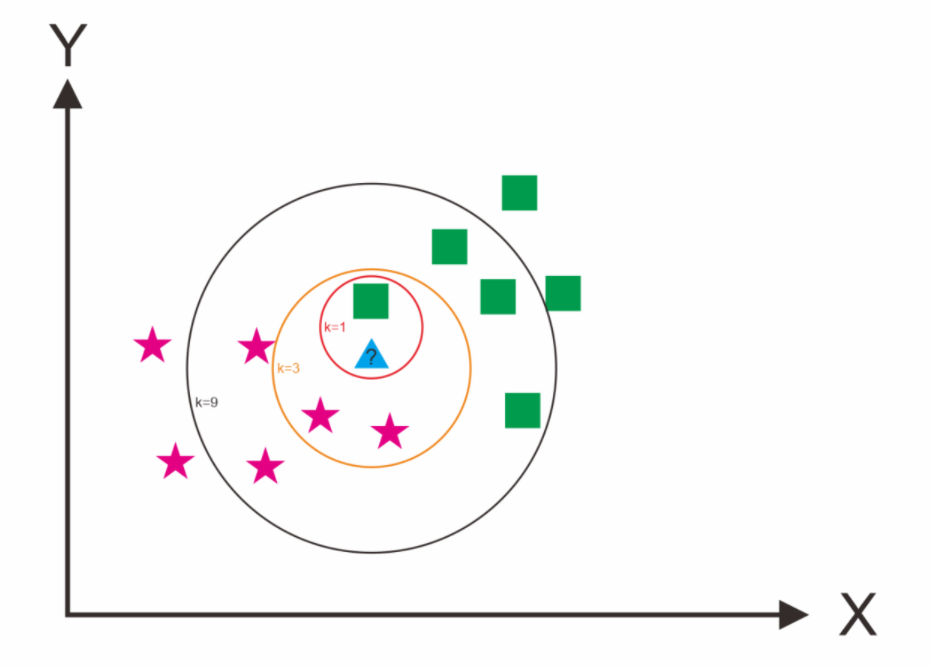

Data baru yang dilambangkan dengan simbol segitiga biru dapat diklasifikasikan sebagai kelompok kotak hijau atau bintang merah jambu. Jika dilihat berdasarkan kriteria jumlah k=1 maka data segitiga biru diklasifikasikan ke dalam kelompok kotak hijau. Sedangkan jika dilihat berdasarkan kriteria jumlah k=3 maka data tersebut diklasifikasikan sebagai kelompok bintang merah jambu. Hal yang sama juga dapat diterapkan untuk k=9, Sebenarnya, kita telah melakukan klasifikasi berdasarkan jarak. Kedekatan yang dimaksud ketika k=1, k=3, dan k=9, kita selalu mengukur kedekatan antara data baru(segitiga biru) dengan data-data berlabel kelompok sebelumya. Berdasarkan ide dasar diatas, maka diturunkanlah dalam sebuah algoritma untuk menentukan kelompok data dari sebuah inputan data baru(segitiga biru).

#**Algoritma KNN**

1. Menentukan parameter k(jumlah tetangga paling dekat)
2. Menghitung jarak eucliden objek terhadap data training yang diberikan.
3. Mengurutkan hasil no 2 secara asdencing (berurutan dan nilai tinggi ke rendah)
4. Mengumpulkan kategori data(klasifikasi nearest neighbor berdasarkan nilai k)
5. Dengan menggunakan kategori nearest neighbor yang paling mayoritas maka dapat diprediksi kategori objek.

#**Contoh Perhitungan K-Nearest Neighbort**

Diketahui data $x_1$ dan $x_2$ adalah sebagai berikut:


$x_1$  |$x_2$   |Kelas
-------|------- |-----
1  | 1 | 0
1  | 2 | 0
3  | 2 | 0
12 | 11| 1
11 | 13| 1
14 | 15| 1

Kita diminta menentukan kelas dari data baru yaitu (9,10) dengan parameter k=3

**Langkah 1:**

Menentukan parameter k(jumlah tetangga paling dekat)

k=3

**Langkah 2:**

Menghitung jarak eucliden objek terhadap data training yang diberikan.

Formula jarak Euclidean:
$d_ij=\sqrt{(x1_i-x1_j)^2+ (x2_i-x2_j)^2} untuk i ,j=1,2,3,..n$

$x_1$  |$x_2$   |Jarak Euclidean dengan (9.10)
-------|------- |-----
1  | 1 |$\sqrt{(9-1)^2 +(10-1)^2=12.04}$
1  | 2 |$\sqrt{(9-2)^2 +(10-2)^2=10.63}$
3  | 2 |$\sqrt{(9-3)^2 +(10-2)^2=10}$
12 | 11|$\sqrt{(9-12)^2 +(10-11)^2=3.16}$
11 | 13|$\sqrt{(9-11)^2 +(10-13)^2=3.60}$
14 | 15|$\sqrt{(9-14)^2 +(10-15)^2=7.07}$

**Langkah 3:**
Mengurutkan hasil langah 2 secara ascending(berurutan dari nilai tinggi ke rendah)

$x_1$  |$x_2$   |Jarak Euclidean dengan (9.10) |Urutan(Jarak Terpendek)
-------|------- |----- |----
1  | 1 |$\sqrt{(9-1)^2 +(10-1)^2=12.04}$ | 6
1  | 2 |$\sqrt{(9-2)^2 +(10-2)^2=10.63}$ | 5
3  | 2 |$\sqrt{(9-3)^2 +(10-2)^2=10}$ | 4
12 | 11|$\sqrt{(9-12)^2 +(10-11)^2=3.16}$ | 1
11 | 13|$\sqrt{(9-11)^2 +(10-13)^2=3.60}$ | 2
14 | 15|$\sqrt{(9-14)^2 +(10-15)^2=7.07}$| 3

**Langkah 4:**

Mengumpulkan kategori data (Klasifikasi nearest neighbor berdasarkan nilai k)

Kelas data 3 terdekat(k=3)

(12,11)=1,(11,13)=1,(14,15)=1

**Langkah 5:**

Dengan menggunakan kategori nearest neighbor yang paling mayoritas maka dapat diprediksikan kategori objek.

kelas data untuk k=3

'0'=0, '1'=3

Maka disimpulkan bahwa data (9,10) diklasifikasikan ke kelas '1'.












# KNN With Various Distance Functions Pada Dataset **Life Expectancy of The World**

### Import Library

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import datasets                                 # Library for sample dataset
from sklearn.model_selection import train_test_split         # Library for spliting data into training & testing
from collections import Counter                              # Library for find most common elemen in the series
import numpy as np                                           # library for numerical in python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Load Dataset

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/lissanuy/Machine-Learning-Algorithm/main/Life_expectancy_dataset.csv',encoding = 'ISO-8859-1')
dataset

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe
...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa


In [ ]:
data = dataset.iloc[:, 3:5]
data.head()

,Male Life,Female Life
0,85.6,93.5
1,81.7,88.5
2,82.3,87.8
3,81.6,87.6
4,80.7,86.1


In [ ]:
array = np.array(data)
print(array)

[[85.6 93.5]
 [81.7 88.5]
 [82.3 87.8]
 [81.6 87.6]
 [80.7 86.1]
 [80.9 85.3]
 [80.3 85.8]
 [80.6 85.1]
 [80.3 85. ]
 [79.9 85.4]
 [80.6 84.4]
 [79.3 85.8]
 [79.8 84.9]
 [79.8 84.8]
 [79.6 85. ]
 [80.2 84.1]
 [79.2 84.6]
 [79.4 84.5]
 [79.7 84.6]
 [78.7 85.1]
 [79.8 83.9]
 [78.7 84.9]
 [78.9 84.3]
 [78.8 84.1]
 [78.1 84.5]
 [79.2 83.6]
 [78.5 84. ]
 [79.5 83. ]
 [79.1 83.3]
 [78.4 83.7]
 [77.9 84. ]
 [78.5 83.2]
 [78.4 83.1]
 [78.5 83. ]
 [77.9 83.3]
 [78.2 83. ]
 [77.8 83.1]
 [78.  82.8]
 [77.4 83.2]
 [77.  83.5]
 [77.  83.2]
 [77.1 82.7]
 [77.5 82.1]
 [76.7 82.8]
 [76.6 82.6]
 [77.  82. ]
 [76.6 82.5]
 [75.8 83.1]
 [76.1 82.8]
 [76.7 81.1]
 [75.7 81.9]
 [76.4 81.1]
 [75.8 81.6]
 [76.7 80.8]
 [77.2 80.1]
 [75.9 81.4]
 [75.7 81.8]
 [75.8 81.6]
 [75.7 81.2]
 [74.6 82. ]
 [75.9 80.5]
 [75.8 80.6]
 [76.6 79.4]
 [75.3 80.8]
 [75.6 79.6]
 [75.  80.7]
 [73.7 81.9]
 [76.3 78.9]
 [73.7 81.7]
 [74.8 80.2]
 [74.8 79.6]
 [74.9 79.6]
 [74.5 80. ]
 [74.1 80.5]
 [74.  80.4]
 [73.5 80.9]
 [74.  80.1]

In [ ]:
dataset['Continent'].value_counts()

Africa           55
Europe           51
Asia             49
North America    34
Oceania          20
South America    14
Name: Continent, dtype: int64

In [ ]:
Africa = dataset[dataset['Continent'] == 'Africa']
sum_Africa = len(Africa)

Europe = dataset[dataset['Continent'] == 'Europe']
sum_Europe = len(Europe)

Asia = dataset[dataset['Continent'] == 'Asia']
sum_Asia= len(Asia)

North_America = dataset[dataset['Continent'] == 'North America']
sum_North_America = len(North_America)

Oceania = dataset[dataset['Continent'] == 'Oceania']
sum_Oceania = len(Oceania)

South_America = dataset[dataset['Continent'] == 'South America']
sum_South_America = len(South_America)

Continent_label = np.array([0] * sum_Africa + [1] *sum_Europe + [2]*sum_Asia+[3]*sum_North_America+[4]*sum_Oceania+[5]*sum_South_America)


In [ ]:
Continent_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5])

In [ ]:
# Spliting data into variable X and y
X, y = array, Continent_label

## Data Preprocessing

In [ ]:
# Split the data into training and testing part
X_latih, X_uji, y_latih, y_uji = train_test_split(X, y, test_size=0.20, random_state=1234)

## Build Function

### Distance Function

In [ ]:
import scipy.spatial.distance as dst

In [ ]:
# Euclidean Distance
dst.euclidean([0,0], [1,1])

1.4142135623730951

In [ ]:
# Manhattan/Cityblock Distance
dst.cityblock([0,0], [1,1])

2

In [ ]:
# Minkowski Distance
dst.minkowski([0,0], [1,1])

1.4142135623730951

In [ ]:
# Chebisev Distance
dst.chebyshev([0,0], [1,1])

1

In [ ]:
# Bray Curtis Distance
dst.braycurtis([0,0], [1,1])

1.0

In [ ]:
# Canberra Distance
dst.canberra([0,0], [1,1])

2.0

### KNN Function

In [ ]:
def _knn_euclidean(x):
    # Menghitung jarak antara x baru dengan semua sampel di data latih
    jarak = [dst.euclidean(x, x_latih) for x_latih in X_latih]
    # Mengurutkan data dan mengambil sejumlah k objek
    k_idx = np.argsort(jarak)[: k]
    # Mengambil kelas dari k tetangga terdekat dari data latih
    k_neighbor_labels = [y_latih[i] for i in k_idx]
    # Mengambil kelas yang paling sering muncul
    kelas_paling_banyak = Counter(k_neighbor_labels).most_common(1)
    return kelas_paling_banyak[0][0]

def KNN_euclidean(X_latih, y_latih, k, x_baru):
    y_pred= [_knn_euclidean(x_i) for x_i in x_baru]
    return np.array(y_pred)

In [ ]:
def _knn_cityblock(x):
    # Menghitung jarak antara x baru dengan semua sampel di data latih
    jarak = [dst.cityblock(x, x_latih) for x_latih in X_latih]
    # Mengurutkan data dan mengambil sejumlah k objek
    k_idx = np.argsort(jarak)[: k]
    # Mengambil kelas dari k tetangga terdekat dari data latih
    k_neighbor_labels = [y_latih[i] for i in k_idx]
    # Mengambil kelas yang paling sering muncul
    kelas_paling_banyak = Counter(k_neighbor_labels).most_common(1)
    return kelas_paling_banyak[0][0]

def KNN_cityblock(X_latih, y_latih, k, x_baru):
    y_pred= [_knn_cityblock(x_i) for x_i in x_baru]
    return np.array(y_pred)

In [ ]:
def _knn_minkowski(x):
    # Menghitung jarak antara x baru dengan semua sampel di data latih
    jarak = [dst.minkowski(x, x_latih) for x_latih in X_latih]
    # Mengurutkan data dan mengambil sejumlah k objek
    k_idx = np.argsort(jarak)[: k]
    # Mengambil kelas dari k tetangga terdekat dari data latih
    k_neighbor_labels = [y_latih[i] for i in k_idx]
    # Mengambil kelas yang paling sering muncul
    kelas_paling_banyak = Counter(k_neighbor_labels).most_common(1)
    return kelas_paling_banyak[0][0]

def KNN_minkowski(X_latih, y_latih, k, x_baru):
    y_pred= [_knn_minkowski(x_i) for x_i in x_baru]
    return np.array(y_pred)

In [ ]:
def _knn_chebyshev(x):
    # Menghitung jarak antara x baru dengan semua sampel di data latih
    jarak = [dst.chebyshev(x, x_latih) for x_latih in X_latih]
    # Mengurutkan data dan mengambil sejumlah k objek
    k_idx = np.argsort(jarak)[: k]
    # Mengambil kelas dari k tetangga terdekat dari data latih
    k_neighbor_labels = [y_latih[i] for i in k_idx]
    # Mengambil kelas yang paling sering muncul
    kelas_paling_banyak = Counter(k_neighbor_labels).most_common(1)
    return kelas_paling_banyak[0][0]

def KNN_chebyshev(X_latih, y_latih, k, x_baru):
    y_pred= [_knn_chebyshev(x_i) for x_i in x_baru]
    return np.array(y_pred)

In [ ]:
def _knn_braycurtis(x):
    # Menghitung jarak antara x baru dengan semua sampel di data latih
    jarak = [dst.braycurtis(x, x_latih) for x_latih in X_latih]
    # Mengurutkan data dan mengambil sejumlah k objek
    k_idx = np.argsort(jarak)[: k]
    # Mengambil kelas dari k tetangga terdekat dari data latih
    k_neighbor_labels = [y_latih[i] for i in k_idx]
    # Mengambil kelas yang paling sering muncul
    kelas_paling_banyak = Counter(k_neighbor_labels).most_common(1)
    return kelas_paling_banyak[0][0]

def KNN_braycurtis(X_latih, y_latih, k, x_baru):
    y_pred= [_knn_braycurtis(x_i) for x_i in x_baru]
    return np.array(y_pred)

In [ ]:
def _knn_canberra(x):
    # Menghitung jarak antara x baru dengan semua sampel di data latih
    jarak = [dst.canberra(x, x_latih) for x_latih in X_latih]
    # Mengurutkan data dan mengambil sejumlah k objek
    k_idx = np.argsort(jarak)[: k]
    # Mengambil kelas dari k tetangga terdekat dari data latih
    k_neighbor_labels = [y_latih[i] for i in k_idx]
    # Mengambil kelas yang paling sering muncul
    kelas_paling_banyak = Counter(k_neighbor_labels).most_common(1)
    return kelas_paling_banyak[0][0]

def KNN_canberra(X_latih, y_latih, k, x_baru):
    y_pred= [_knn_canberra(x_i) for x_i in x_baru]
    return np.array(y_pred)

### Evaluation Function

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### Plot Function

In [ ]:
def bar_plot(df, evalf):

    # Memilih tema plot
    sns.set_theme(style="whitegrid")

    # Membuat sebuah figure dan sebuah axes
    fig, ax=plt.subplots(figsize=(10,8)) # figsize=(x,y) untuk menentukan ukuran gambar

    # Melakukan bar plot
    ax = sns.barplot(data=df,               # Nama DataFrame
                     y=evalf,               # Data sumbu Y
                     x=df.index             # Data sumbu X

                    )
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    # Mengatur sudut rotasi label stepsize sumbu x
    plt.xticks(rotation=80)

    # Mengganti label sumbu x
    ax.set_xlabel('distance')

    # Mengganti label sumbu y
    ax.set_ylabel('{} score'.format(evalf))

    # Mengatur Judul Gambar
    ax.set_title('Evaluation Score of KNN with Various Distance', fontsize=16, fontweight='bold')

    # Menampilkan Gambar
    plt.show()

## Experimentations

In [ ]:
# Parameter
k=2

In [ ]:
# KNN Euclidean Distance
start = time.time()
y_pred=KNN_euclidean(X_latih, y_latih, k, X_uji)
finish = time.time()
time_comp = finish-start
# Evaluation
euclidean =[accuracy_score(y_uji, y_pred),
           precision_score(y_uji, y_pred, average='weighted'),
           recall_score(y_uji, y_pred, average='weighted'),
           f1_score(y_uji, y_pred, average='weighted'),
           time_comp]
euclidean 

[0.9555555555555556,
 0.9608465608465607,
 0.9555555555555556,
 0.9557073379295602,
 0.13216304779052734]

In [ ]:
# KNN Manhattan/City Block Distance
start = time.time()
y_pred=KNN_cityblock(X_latih, y_latih, k, X_uji)
finish = time.time()
time_comp = finish-start
# Evaluation
manhattan =[accuracy_score(y_uji, y_pred),
           precision_score(y_uji, y_pred, average='weighted'),
           recall_score(y_uji, y_pred, average='weighted'),
           f1_score(y_uji, y_pred, average='weighted'),
           time_comp]
manhattan 

[0.9555555555555556,
 0.9608465608465607,
 0.9555555555555556,
 0.9557073379295602,
 0.08430123329162598]

In [ ]:
# KNN Minkowski Distance
start = time.time()
y_pred=KNN_minkowski(X_latih, y_latih, k, X_uji)
finish = time.time()
time_comp = finish-start
# Evaluation
minkowski =[accuracy_score(y_uji, y_pred),
           precision_score(y_uji, y_pred, average='weighted'),
           recall_score(y_uji, y_pred, average='weighted'),
           f1_score(y_uji, y_pred, average='weighted'),
           time_comp]
minkowski

[0.9555555555555556,
 0.9608465608465607,
 0.9555555555555556,
 0.9557073379295602,
 0.10064220428466797]

In [ ]:
# KNN Chebyshev Distance
start = time.time()
y_pred=KNN_chebyshev(X_latih, y_latih, k, X_uji)
finish = time.time()
time_comp = finish-start
# Evaluation
chebyshev =[accuracy_score(y_uji, y_pred),
           precision_score(y_uji, y_pred, average='weighted'),
           recall_score(y_uji, y_pred, average='weighted'),
           f1_score(y_uji, y_pred, average='weighted'),
           time_comp]
chebyshev

[0.9555555555555556,
 0.9608465608465607,
 0.9555555555555556,
 0.9557073379295602,
 0.08106279373168945]

In [ ]:
# KNN Bray Curtis Distance
start = time.time()
y_pred=KNN_braycurtis(X_latih, y_latih, k, X_uji)
finish = time.time()
time_comp = finish-start
# Evaluation
braycurtis =[accuracy_score(y_uji, y_pred),
           precision_score(y_uji, y_pred, average='weighted'),
           recall_score(y_uji, y_pred, average='weighted'),
           f1_score(y_uji, y_pred, average='weighted'),
           time_comp]
braycurtis

[0.9333333333333333,
 0.937037037037037,
 0.9333333333333333,
 0.9336026936026937,
 0.12974143028259277]

In [ ]:
# KNN Canberra Distance
start = time.time()
y_pred=KNN_canberra(X_latih, y_latih, k, X_uji)
finish = time.time()
time_comp = finish-start
# Evaluation
canberra =[accuracy_score(y_uji, y_pred),
           precision_score(y_uji, y_pred, average='weighted'),
           recall_score(y_uji, y_pred, average='weighted'),
           f1_score(y_uji, y_pred, average='weighted'),
           time_comp]
canberra

[0.9555555555555556,
 0.9608465608465607,
 0.9555555555555556,
 0.9557073379295602,
 0.2955281734466553]

### Evaluation

In [ ]:
df = pd.DataFrame([euclidean,
                  manhattan,
                  minkowski,
                  chebyshev,
                  braycurtis,
                  canberra], 
                  columns = ['accuracy','precision', 'recall', 'f1', 'time'],
                 index = ['euclidean', 'manhattan', 'minkowski', 'chebyshev', 'braycurtis', 'canberra'])
df

,accuracy,precision,recall,f1,time
euclidean,0.955556,0.960847,0.955556,0.955707,0.132163
manhattan,0.955556,0.960847,0.955556,0.955707,0.084301
minkowski,0.955556,0.960847,0.955556,0.955707,0.100642
chebyshev,0.955556,0.960847,0.955556,0.955707,0.081063
braycurtis,0.933333,0.937037,0.933333,0.933603,0.129741
canberra,0.955556,0.960847,0.955556,0.955707,0.295528


### Visualization

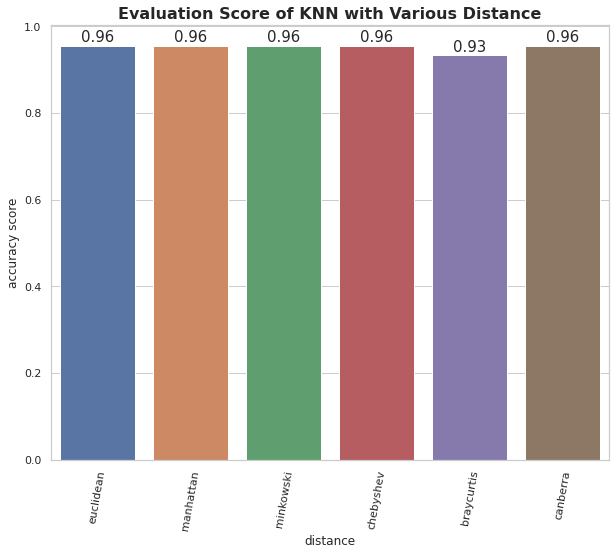

In [ ]:
bar_plot(df, 'accuracy')

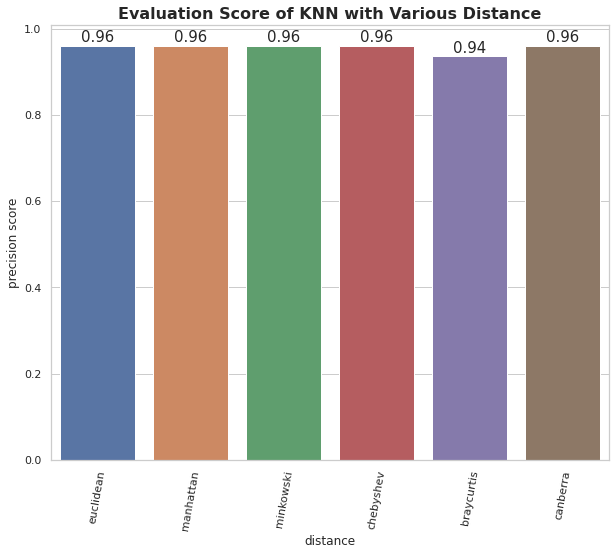

In [ ]:
bar_plot(df, 'precision')

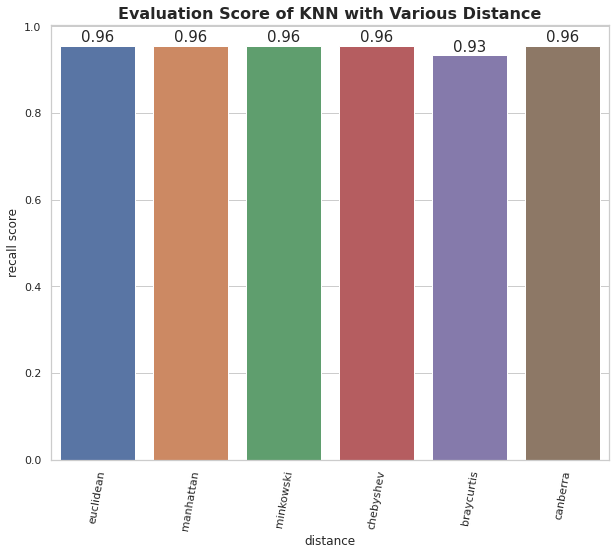

In [ ]:
bar_plot(df, 'recall')

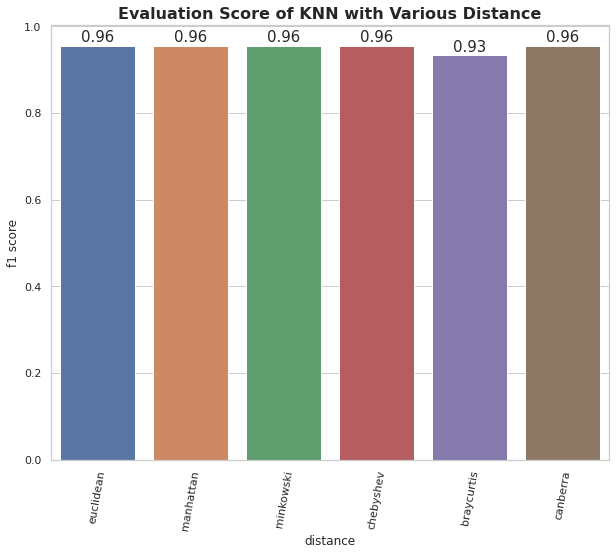

In [ ]:
bar_plot(df, 'f1')

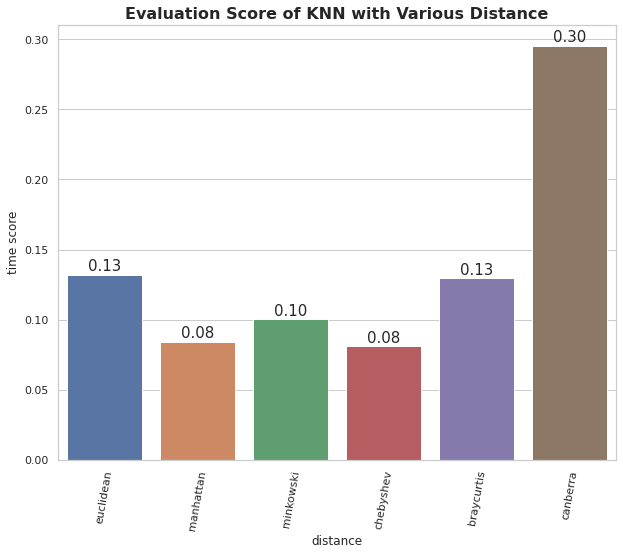

In [ ]:
bar_plot(df, 'time')

## Conclusion

Berdasarkan hasil pengujian, performa metode KKN dengan jarak Eucliden, Manhattan, Minkowski, Chebishev dan Canberra menghasilkan akurasi,presisi, dan f1-score yang sama dan lebih tinggi dibandingkan dengan jarak Bray-Curtiz, namun dalam masalah waktu komputasi jarak Manhattan dan Chebishev lebih baik dibandingkan dengan  jarak Eucliden, Minkowski dan Canberra sehingga dapat disimpulkan dalam pengolahan data Life Expectancy of The World ini, algoritma KNN dengan jarak Manhattan dan Chebishev menjadi model terbaik.